In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import talib
import plotly.graph_objects as go

In [3]:
# Define the ticker symbol for Apple
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']
stock_dataframes = {}
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01', progress=False)
    stock = stock.reset_index()  # Reset index to get the 'Date' column as a regular column
    stock_dataframes[symbol] = stock

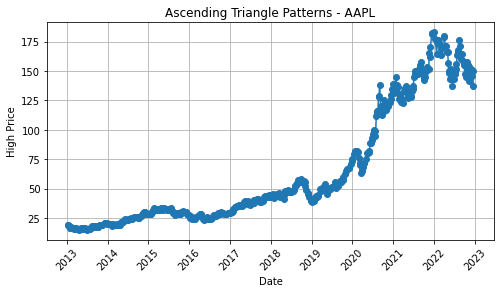

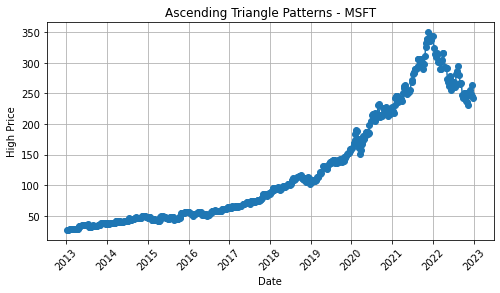

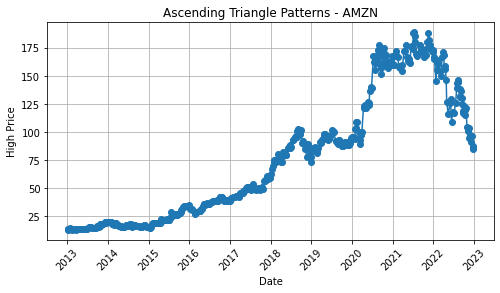

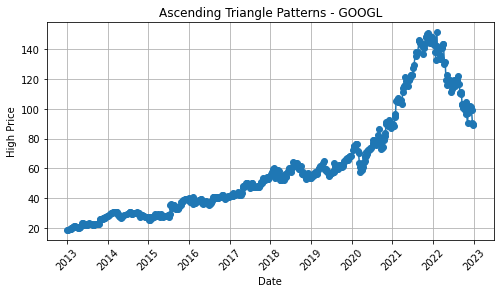

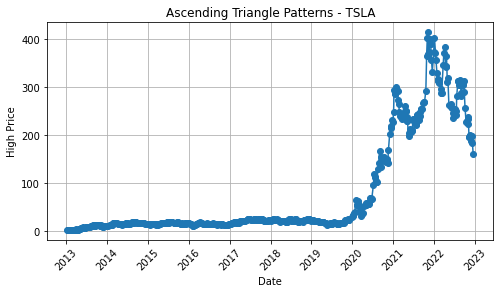

In [4]:
def find_ascending_triangle(stock_prices):
    patterns = []
    for i in range(1, len(stock_prices) - 1):
        curr_price = stock_prices.iloc[i]['High']
        prev_price = stock_prices.iloc[i - 1]['High']
        next_price = stock_prices.iloc[i + 1]['High']

        if curr_price > prev_price and curr_price > next_price:
            patterns.append(stock_prices.iloc[i])

    return patterns

for symbol, stock_df in stock_dataframes.items():
    patterns = find_ascending_triangle(stock_df)

    if patterns:
        dates = [pattern['Date'] for pattern in patterns]
        highs = [pattern['High'] for pattern in patterns]

        plt.figure(figsize=(8, 4))
        plt.plot(dates, highs, marker='o')
        plt.title(f"Ascending Triangle Patterns - {symbol}")
        plt.xlabel("Date")
        plt.ylabel("High Price")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

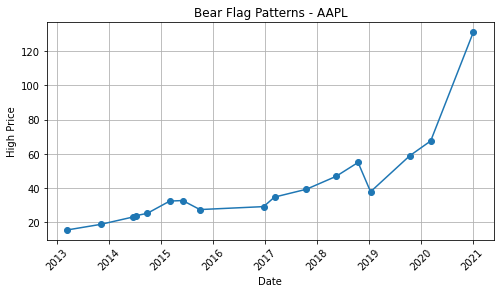

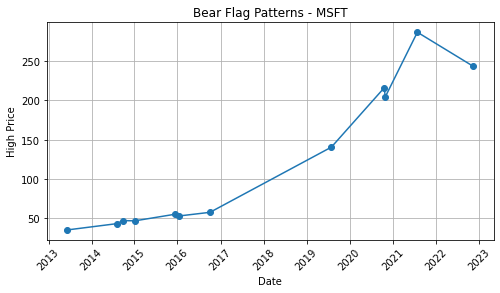

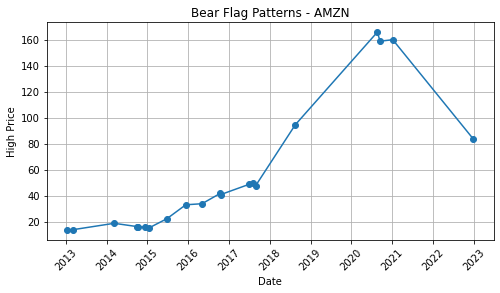

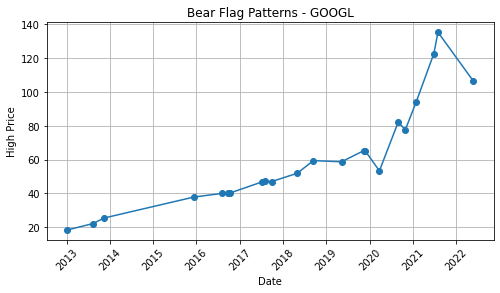

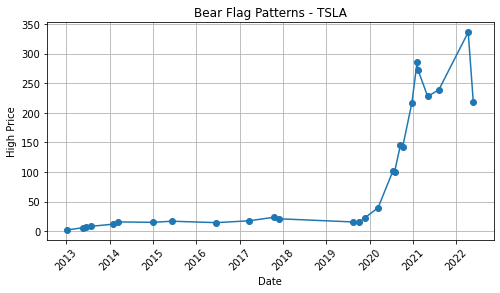

In [5]:
def find_bear_flag(stock_prices):
    patterns = []
    for i in range(2, len(stock_prices) - 1):
        curr_price = stock_prices.iloc[i]['High']
        prev_price1 = stock_prices.iloc[i - 1]['High']
        prev_price2 = stock_prices.iloc[i - 2]['High']
        next_price = stock_prices.iloc[i + 1]['High']
        prev_low = stock_prices.iloc[i - 1]['Low']
        prev2_low = stock_prices.iloc[i - 2]['Low']

        if (
            curr_price < prev_price1 and
            curr_price < prev_price2 and
            curr_price < next_price and
            prev_price1 < prev_price2 and
            prev_price1 > next_price and
            prev_low > prev2_low
        ):
            patterns.append(stock_prices.iloc[i])

    return patterns

for symbol, stock_df in stock_dataframes.items():
    patterns = find_bear_flag(stock_df)

    if patterns:
        dates = [pattern['Date'] for pattern in patterns]
        highs = [pattern['High'] for pattern in patterns]

        plt.figure(figsize=(8, 4))
        plt.plot(dates, highs, marker='o')
        plt.title(f"Bear Flag Patterns - {symbol}")
        plt.xlabel("Date")
        plt.ylabel("High Price")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

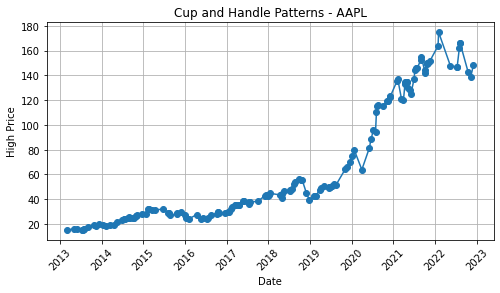

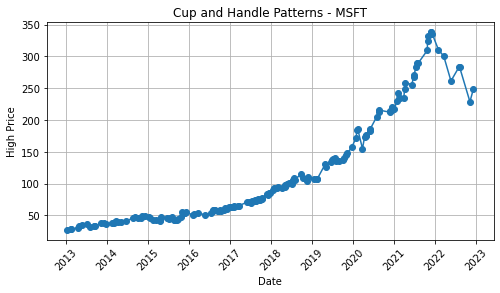

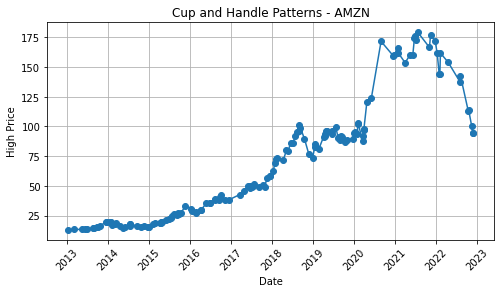

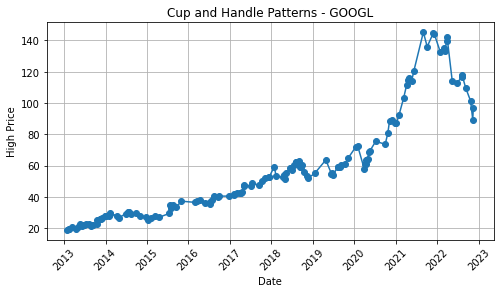

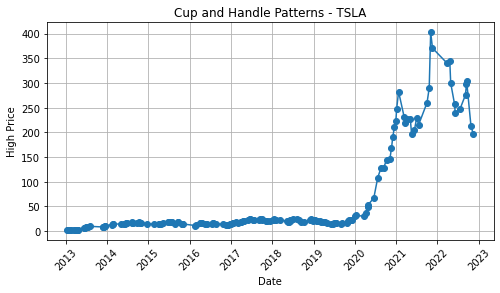

In [6]:
def find_cup_and_handle(stock_prices):
    patterns = []
    for i in range(1, len(stock_prices) - 1):
        curr_price = stock_prices.iloc[i]['High']
        prev_price1 = stock_prices.iloc[i - 1]['High']
        next_price = stock_prices.iloc[i + 1]['High']
        prev_low = stock_prices.iloc[i - 1]['Low']
        prev2_low = stock_prices.iloc[i - 2]['Low']

        if (
            curr_price < prev_price1 and
            curr_price < next_price and
            prev_price1 < next_price and
            prev_price1 > prev_low and
            prev_low > prev2_low
        ):
            patterns.append(stock_prices.iloc[i])

    return patterns

for symbol, stock_df in stock_dataframes.items():
    patterns = find_cup_and_handle(stock_df)

    if patterns:
        dates = [pattern['Date'] for pattern in patterns]
        highs = [pattern['High'] for pattern in patterns]

        plt.figure(figsize=(8, 4))
        plt.plot(dates, highs, marker='o')
        plt.title(f"Cup and Handle Patterns - {symbol}")
        plt.xlabel("Date")
        plt.ylabel("High Price")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

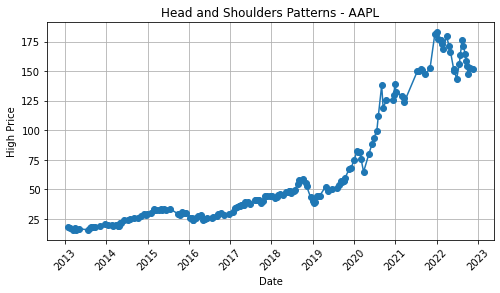

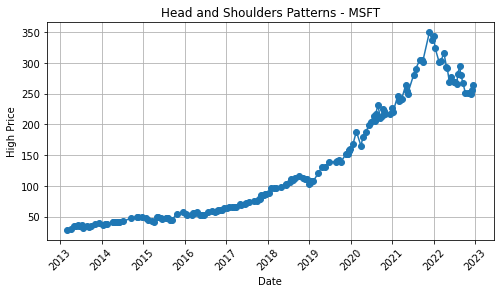

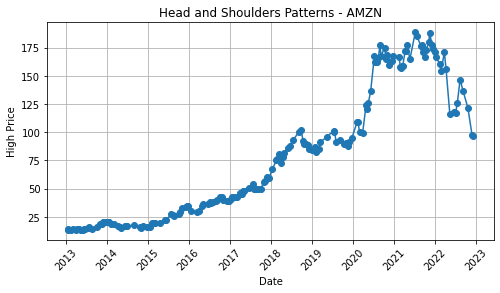

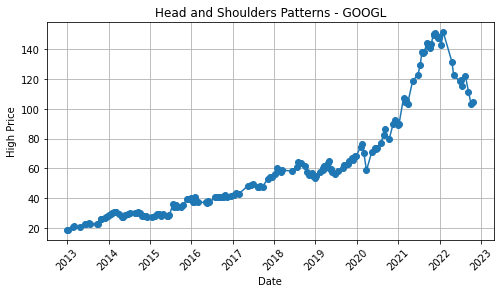

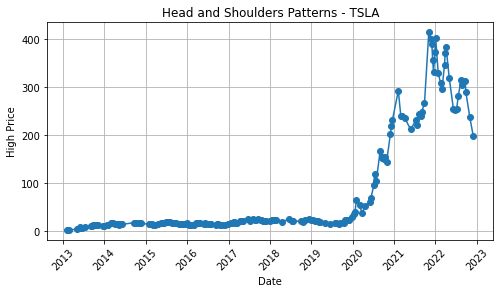

In [7]:
def find_head_and_shoulders(stock_prices):
    patterns = []
    for i in range(2, len(stock_prices) - 2):
        curr_price = stock_prices.iloc[i]['High']
        prev_price1 = stock_prices.iloc[i - 1]['High']
        prev_price2 = stock_prices.iloc[i - 2]['High']
        next_price1 = stock_prices.iloc[i + 1]['High']
        next_price2 = stock_prices.iloc[i + 2]['High']

        if (
            curr_price > prev_price1 and
            curr_price > prev_price2 and
            curr_price > next_price1 and
            curr_price > next_price2 and
            prev_price1 > prev_price2 and
            next_price1 > next_price2
        ):
            patterns.append(stock_prices.iloc[i])

    return patterns

for symbol, stock_df in stock_dataframes.items():
    patterns = find_head_and_shoulders(stock_df)

    if patterns:
        dates = [pattern['Date'] for pattern in patterns]
        highs = [pattern['High'] for pattern in patterns]

        plt.figure(figsize=(8, 4))
        plt.plot(dates, highs, marker='o')
        plt.title(f"Head and Shoulders Patterns - {symbol}")
        plt.xlabel("Date")
        plt.ylabel("High Price")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

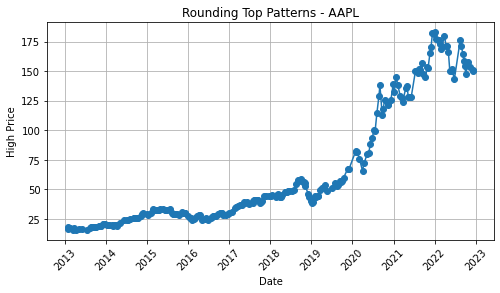

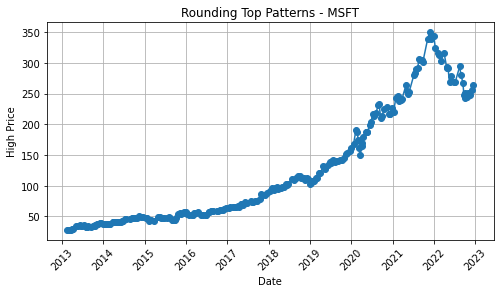

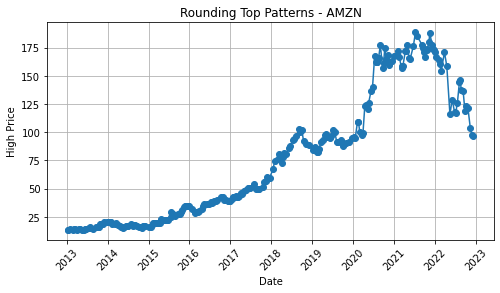

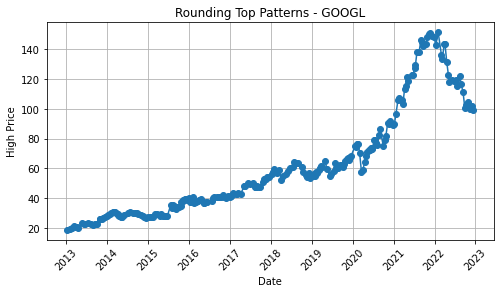

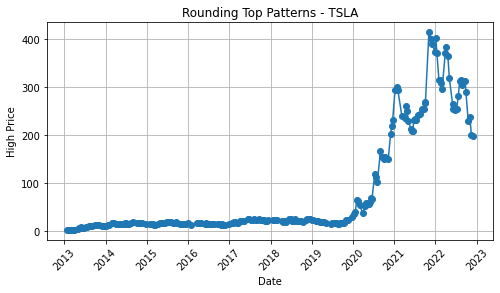

In [8]:
def find_rounding_top(stock_prices):
    patterns = []
    for i in range(3, len(stock_prices) - 3):
        curr_price = stock_prices.iloc[i]['High']
        prev_price1 = stock_prices.iloc[i - 1]['High']
        prev_price2 = stock_prices.iloc[i - 2]['High']
        next_price1 = stock_prices.iloc[i + 1]['High']
        next_price2 = stock_prices.iloc[i + 2]['High']
        prev_price3 = stock_prices.iloc[i - 3]['High']
        next_price3 = stock_prices.iloc[i + 3]['High']

        if (
            curr_price > prev_price1 and
            curr_price > prev_price2 and
            curr_price > prev_price3 and
            curr_price > next_price1 and
            curr_price > next_price2 and
            curr_price > next_price3
        ):
            patterns.append(stock_prices.iloc[i])

    return patterns

for symbol, stock_df in stock_dataframes.items():
    patterns = find_rounding_top(stock_df)

    if patterns:
        dates = [pattern['Date'] for pattern in patterns]
        highs = [pattern['High'] for pattern in patterns]

        plt.figure(figsize=(8, 4))
        plt.plot(dates, highs, marker='o')
        plt.title(f"Rounding Top Patterns - {symbol}")
        plt.xlabel("Date")
        plt.ylabel("High Price")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()